In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

import pickle
from functools import reduce
from dateutil.relativedelta import *

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
from helpers import load, plot, analyse

plot.ERC_Management().set_plot_params()
fig_width = 6.33

In [3]:
## Load data
start_date = '2023-02-08 12:00:00' #gut um nans zu zeigen
end_date = '2023-02-08 18:00:00'
#start_date = '2022-06-01 01:00:00' #gut um nans zu zeigen
#end_date = '2022-06-05 02:05:00'
data_raw = load.load_raw_data(start_date, end_date, masked=True)
new_time_interval = '300S'

In [4]:
## Februar Daten haben alles, um den Effekt vom Resampling zu analysieren: am Anfang an-aus (Volumenstrom), danach konstanter Volumenstrom mit hoch und runter in der Temperatur. 

In [5]:
#df_mean = data_raw.resample('300S').apply(lambda x: np.average(x[f'Probe_{probe}_T_in']))

In [6]:
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

In [7]:
data_mean = data_raw.resample(new_time_interval).mean()

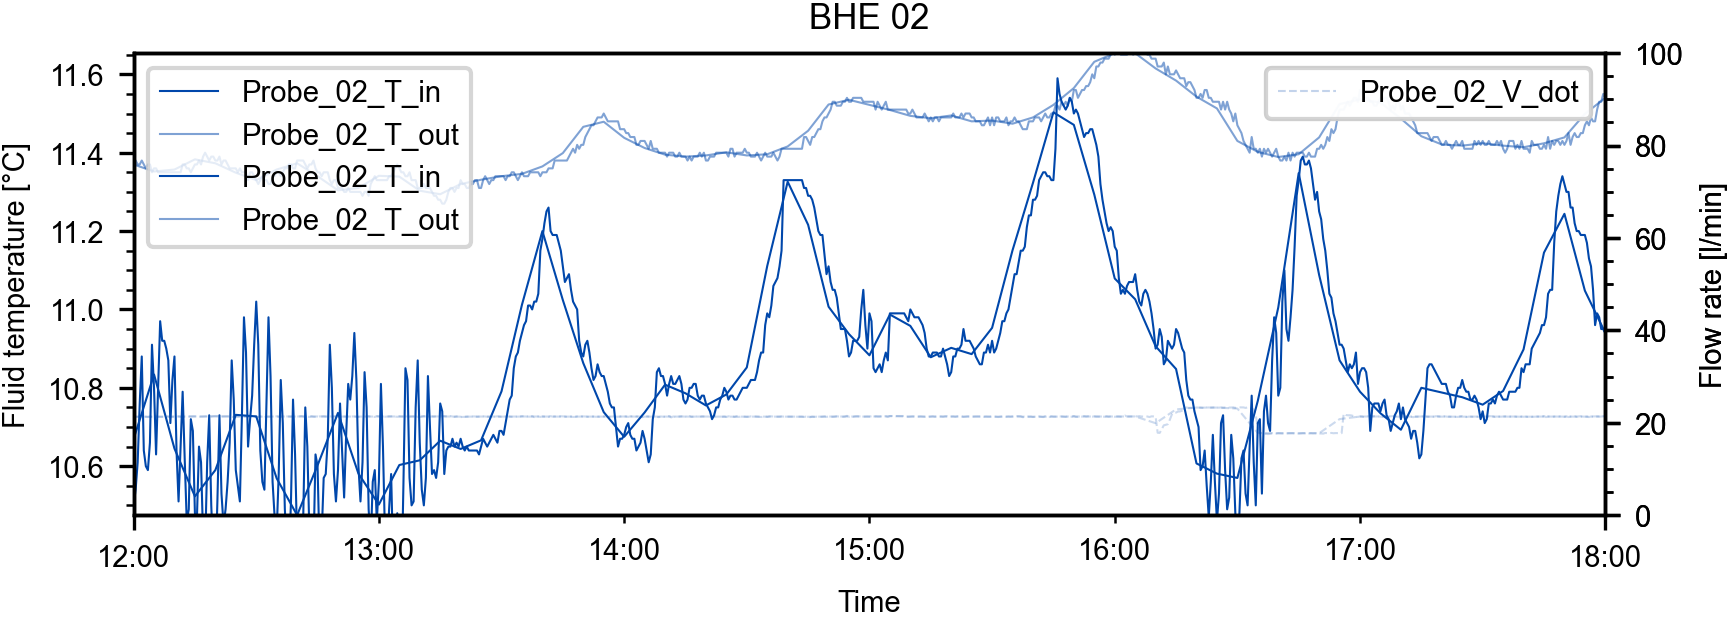

In [13]:
fig, ax = plot.plot_one_BHE(data_raw, '02', figsize=(fig_width, 2), dpi=300, linewidth=0.5)
plot.plot_one_BHE(data_mean, '02', figsize=(fig_width, 2), dpi=300, linewidth=0.5, ax=ax)

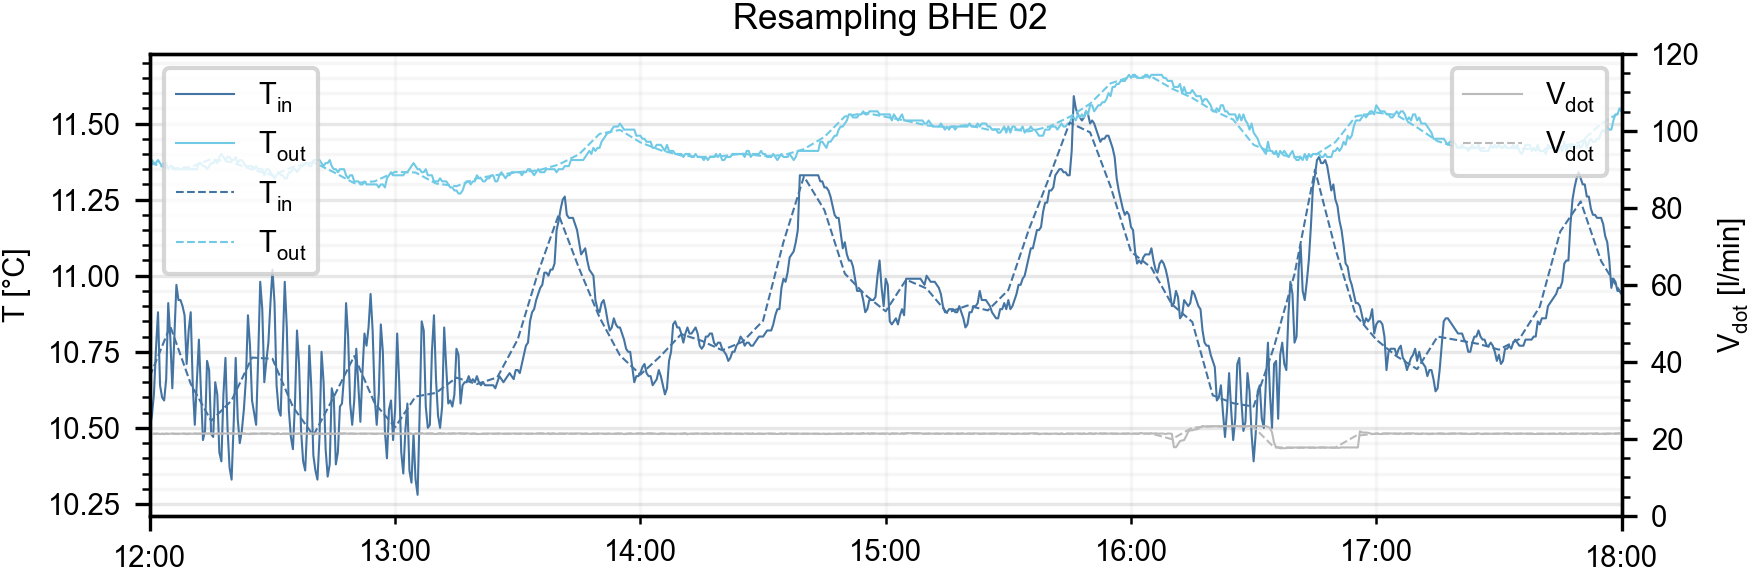

In [19]:
colors= ['#4474A2', '#70CAE6']
linewidth=.5
probe='02'

all_color_dict = plot.ERC_Management().create_colordict(probe_strings=False)
titlestr = ''
fig, ax = plt.subplots(1,1,figsize=(fig_width, 2), dpi=300)
ax2 = ax.twinx()

data_raw.plot(ax=ax, y = f'Probe_{probe}_T_in', linewidth=linewidth, color=colors[0], label='$\mathregular{T_{in}}$')
data_raw.plot(ax=ax, y = f'Probe_{probe}_T_out', linewidth=linewidth, color=colors[1], label='$\mathregular{T_{out}}$')
data_raw.plot(ax=ax2, y= f'Probe_{probe}_V_dot', linewidth=linewidth, color='#BABABA', label='$\mathregular{V_{dot}}$')

data_mean.plot(ax=ax, y = f'Probe_{probe}_T_in', linewidth=linewidth, color=colors[0], label='$\mathregular{T_{in}}$', linestyle='--')
data_mean.plot(ax=ax, y = f'Probe_{probe}_T_out', linewidth=linewidth, color=colors[1], label='$\mathregular{T_{out}}$', linestyle='--')
data_mean.plot(ax=ax2, y= f'Probe_{probe}_V_dot', linewidth=linewidth, color='#BABABA', label='$\mathregular{V_{dot}}$', linestyle='--')

vdot_ymax = 120


#ax.set_xlim('2022-06-25 00:00:00', '2022-06-30 00:00:00')
#plt.savefig('../Grafiken/O_data_preparation_mask.pdf', bbox_inches='tight')

ax2.legend(loc='upper right')
ax.legend(loc='upper left')

# Re-arrange legends to last axis
all_axes = fig.get_axes()
for axis in all_axes:
    legend = axis.get_legend()
    if legend is not None:
        legend.remove()
        all_axes[-1].add_artist(legend)
        
ax.set_xlim(start_date, end_date)
ax.set_title(f' Resampling BHE {probe}')

ax2.set_ylim(0,120)
ax2.set_ylabel('$\mathregular{V_{dot}}$ [l/min]')

ax.grid(alpha=.3, which='major')
ax.grid(alpha=.1, which='minor')
ax.set_ylabel('T [°C]')
ax.set_xlabel('')
fig.savefig('Resampling.pdf', bbox_inches='tight')

### Just some more comparison stuff for the mean, weighted mean and median

In [ ]:
data_median = data_raw.resample(new_time_interval).median()
#data_roll = data_raw.resample(new_time_interval).pad().rolling(3).mean()

<Axes: title={'center': 'BHE 02'}, xlabel='Time', ylabel='Fluid temperature [°C]'>

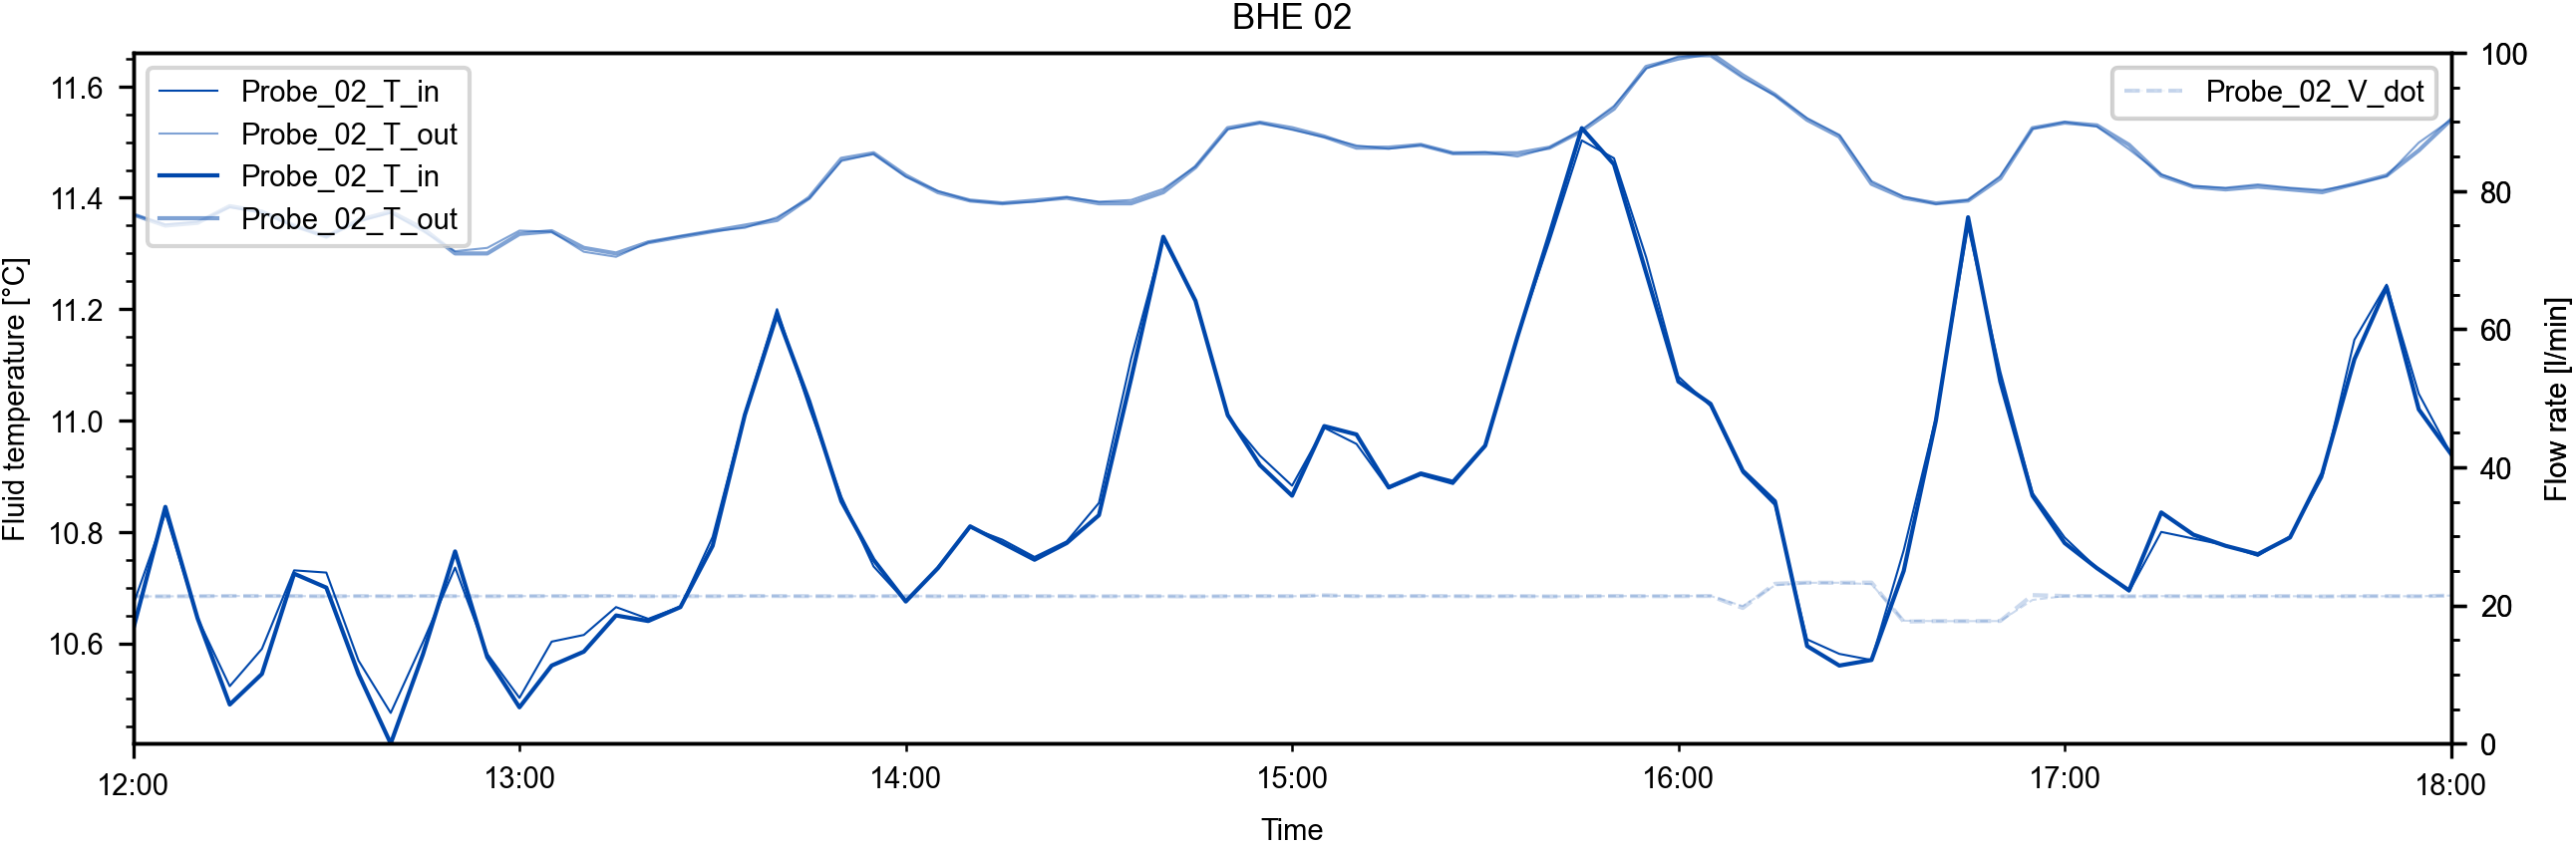

In [9]:
#ax = plot.plot_one_BHE(data_raw, '02', figsize=(fig_width, 2), dpi=300, linewidth=0.5)
ax = plot.plot_one_BHE(data_mean, '02', figsize=(fig_width, 2), dpi=300, linewidth=0.5)
plot.plot_one_BHE(data_median, '02', ax=ax)

In [10]:
### Weighted mean with volume flow rate
df_weighted = pd.DataFrame()

for probe in np.arange(1,41,1):
    probe = f'{probe:02d}'
    #try:
    df_weighted[f'Probe_{probe}_T_in'] = data_raw.resample('300S').apply(lambda x: np.ma.average(x[f'Probe_{probe}_T_in'], weights=x[f'Probe_{probe}_V_dot']))
    df_weighted[f'Probe_{probe}_T_out'] = data_raw.resample('300S').apply(lambda x: np.ma.average(x[f'Probe_{probe}_T_out'], weights=x[f'Probe_{probe}_V_dot']))
    df_weighted[f'Probe_{probe}_V_dot'] = data_raw.resample('300S').apply(lambda x: np.ma.average(x[f'Probe_{probe}_V_dot'], weights=x[f'Probe_{probe}_V_dot']))

In [11]:
west_in, south_in, east_in = analyse.get_ID_strings(after='_T_in')
west_out, south_out, east_out = analyse.get_ID_strings(after='_T_out')
west_vdot, south_vdot, east_vdot = analyse.get_ID_strings(after='_V_dot')
all_color_dict = plot.get_colordict(after='_T_out')
all_color_dict_in = plot.get_colordict(after='_T_in')
lw = .5

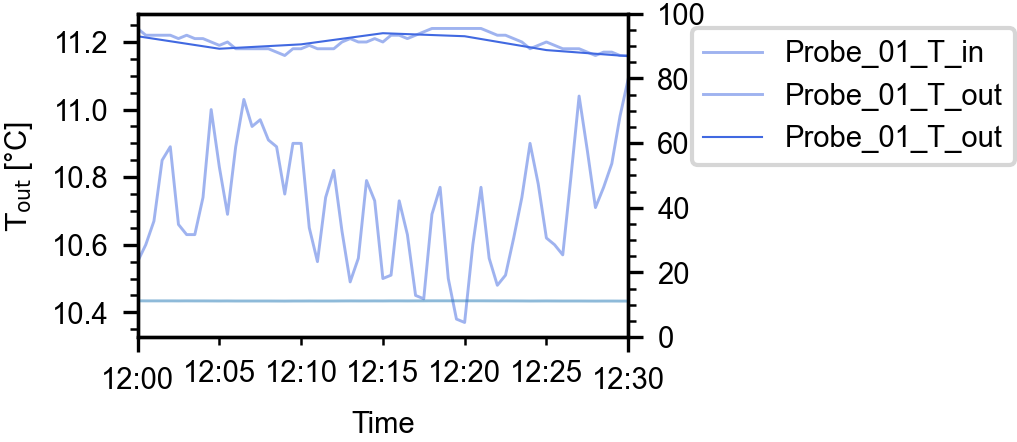

In [12]:
t1 = '2023-02-07 12:00:00'
t2 = '2023-02-08 12:30:00'
#t1 = '2022-06-04 16:00:00'
#t2 = '2022-06-04 22:30:00'
fromd = 0
until = 1
lw=.5
fig, ax = plt.subplots(1,1, figsize=(fig_width/3, 1.4), dpi=300)
ax2 = ax.twinx()
ax2.set_ylim(0,100)
data_raw.loc[t1:t2][west_in[fromd:until]].plot(ax=ax, legend=False, alpha=.5, color=[all_color_dict_in.get(x, 'k') for x in west_in[fromd:until]], linewidth=lw+.2, label='30s')
data_raw.loc[t1:t2][west_out[fromd:until]].plot(ax=ax, legend=False, alpha=.5, color=[all_color_dict_in.get(x, 'k') for x in west_in[fromd:until]], linewidth=lw+.2, label='30s')
data_raw.loc[t1:t2][west_out[fromd:until]].plot(ax=ax2, legend=False, alpha=.5, linewidth=lw+.2, label='30s')
df_weighted.loc[t1:t2][west_out[fromd:until]].plot(ax=ax, legend=False, color=[all_color_dict_in.get(x, 'k') for x in west_in[fromd:until]], linewidth=lw, label='5min - weighted')
#data_mean.loc[t1:t2][west_in[fromd:until]].plot(ax = ax[0], legend=False, color=[all_color_dict_in.get(x, 'k') for x in west_in[fromd:until]], linestyle='--', linewidth=lw, label='5 min - mean')
#data_median.loc[t1:t2][west_in[fromd:until]].plot(ax = ax[0], legend=True, color=[all_color_dict.get(x, 'k') for x in west_in[fromd:until]], linestyle='-.', linewidth=lw, alpha=.5, label= '5 min - median')
ax.set_ylabel('$\mathrm{T_{out}}$ [°C]')

ax.legend(bbox_to_anchor=(1.1,1))
#fig.savefig('30s_5min_data1.pdf', bbox_inches='tight')

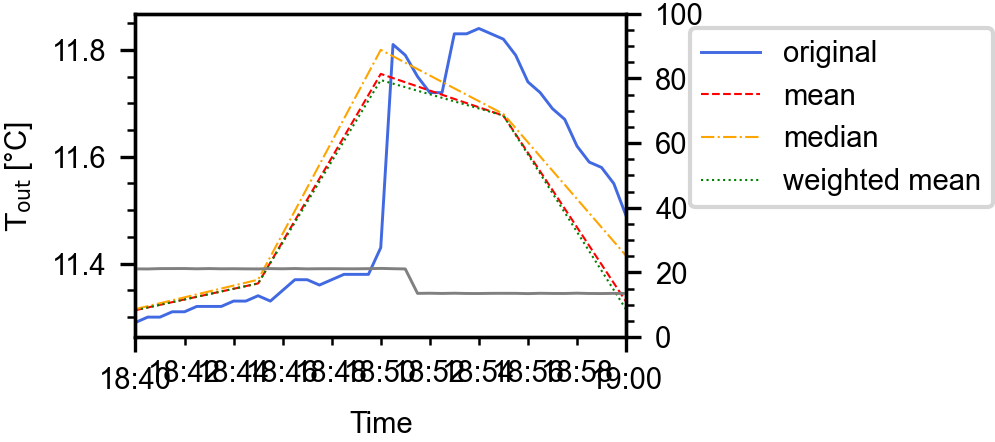

In [17]:
t1 = '2023-02-07 18:40:00'
t2 = '2023-02-07 19:00:00'
#t1 = '2022-06-04 06:00:00'
#t2 = '2022-06-04 07:00:00'
fromd = 0
until = 1
fig, ax = plt.subplots(1,1, figsize=(fig_width/3, 1.4), dpi=300)

#ax.set_ylim(10.5,12.5)
data_raw.loc[t1:t2][west_in[fromd:until]].plot(ax=ax, legend=False, color=[all_color_dict_in.get(x, 'k') for x in west_in[fromd:until]], linewidth=lw+.2, label='30s')
data_mean.loc[t1:t2][west_in[fromd:until]].plot(ax = ax, legend=False, color='red', linestyle='--', linewidth=lw, label='5 min - mean')
data_median.loc[t1:t2][west_in[fromd:until]].plot(ax = ax, legend=True, color='orange', linestyle='-.', linewidth=lw, label= '5 min - median')
df_weighted.loc[t1:t2][west_in[fromd:until]].plot(ax=ax, legend=False, color='green', linestyle='dotted', linewidth=lw, label='5min - weighted')
ax.set_ylabel('$\mathrm{T_{out}}$ [°C]')

handles, labels = plt.gca().get_legend_handles_labels()
labels = ['original', 'mean', 'median', 'weighted mean']

ax2 = ax.twinx()
data_raw.loc[t1:t2][west_vdot[fromd:until]].plot(ax=ax2, legend=False, linewidth=lw+.2, color='gray')
ax2.set_ylim(0,100)

legend = ax.legend(handles=handles, labels = labels, bbox_to_anchor=(1.1,1))

#fig.savefig('mean_median_weightedmean.png', bbox_inches='tight')